### Example 6 - Boxplots

### 2.1 What to do?
In this example we will create boxplots to compare continuous data across groups. Load the exemplary data (ex6.csv) and prepare the groups you want to visualize (e.g., two subgroups of a measurement). The goal is to plot boxplots with overlaid data points and optionally display pairwise p-values between groups.

The function `statsmed.boxplot_figure()` allows you to make these plots quickly. It requires:
- **x**: a matplotlib Axes object to draw on (e.g., `plt.gca()` or a subplot axis)
- **data**: list of 1D arrays/lists; each entry is one group of values (exclude NaN/None)
- **independent**: `True` for independent groups, `False` for paired/matched samples
- **mode**: `'normal distribution'`, `'no normal distribution'`, or `'choose'` (auto-select)
- **title, x_label, y_label**: strings for labeling
- **x_ticklabels**: list of group names shown on the x-axis
- **color_points**: color for overlaid scatter points (default `'g'`)
- **show_p_values**: `True` to compute and annotate significant pairwise p-values

If applied to your own data please be careful with possible NaN or None values in your data and ensure that `independent` and `mode` reflect your study design and distributional assumptions.

So let us compare two subgroups as a simple example.

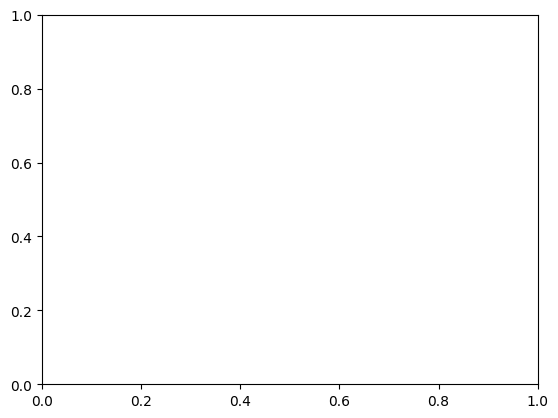

In [1]:
import pandas
import numpy as np
from statsmed import statsmed
import matplotlib.pyplot as plt
data = pandas.read_csv('ex6.csv',delimiter=',',on_bad_lines='skip')

new_data = data[['kidney_right_volume_R1','kidney_right_volume_R2']][(data['kidney_right_volume_R1'] > 10) & (data['kidney_right_volume_R2'] > 10)]/1000
new_data = new_data[:50] #only look at the first 50 volumes (just for example so that the confidence intervals get larger)


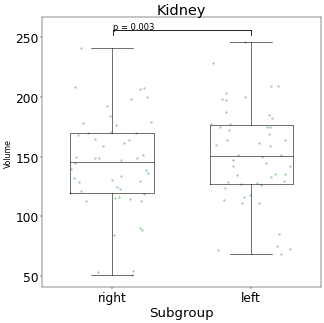

In [2]:
dd = [new_data['kidney_right_volume_R1'], new_data['kidney_right_volume_R2']+3]


fig=plt.figure(figsize=(8, 8),dpi=40)
x1=fig.add_subplot(1,1,1)
statsmed.boxplot_figure(x1,dd,False,mode = 'no normal distribution', title='Kidney', x_label = 'Subgroup', y_label= 'Volume', x_ticklabels=['right', 'left'], show_p_values = True)
x1.yaxis.label.set_size(14)


Please note in this example, that as the kidneys belong to the same patient we chose independent = False.
Next you will find an example without the automatically generated p-values, so show_p_values = False.

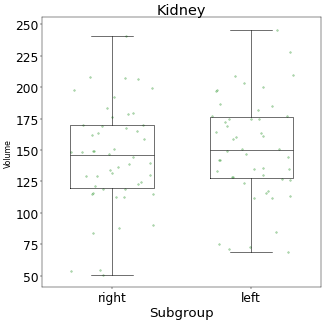

In [3]:

fig=plt.figure(figsize=(8, 8),dpi=40)
x1=fig.add_subplot(1,1,1)
statsmed.boxplot_figure(x1,dd,False,mode = 'no normal distribution', title='Kidney', x_label = 'Subgroup', y_label= 'Volume', x_ticklabels=['right', 'left'], show_p_values = False)
x1.yaxis.label.set_size(14)

So we created a boxplot figure comparing two subgroups, with each box showing the median and interquartile range and overlaid scatter points for individual observations. When `show_p_values=True`, significant pairwise differences between groups are annotated with brackets and p-values above the boxes.

Let us make more plots...

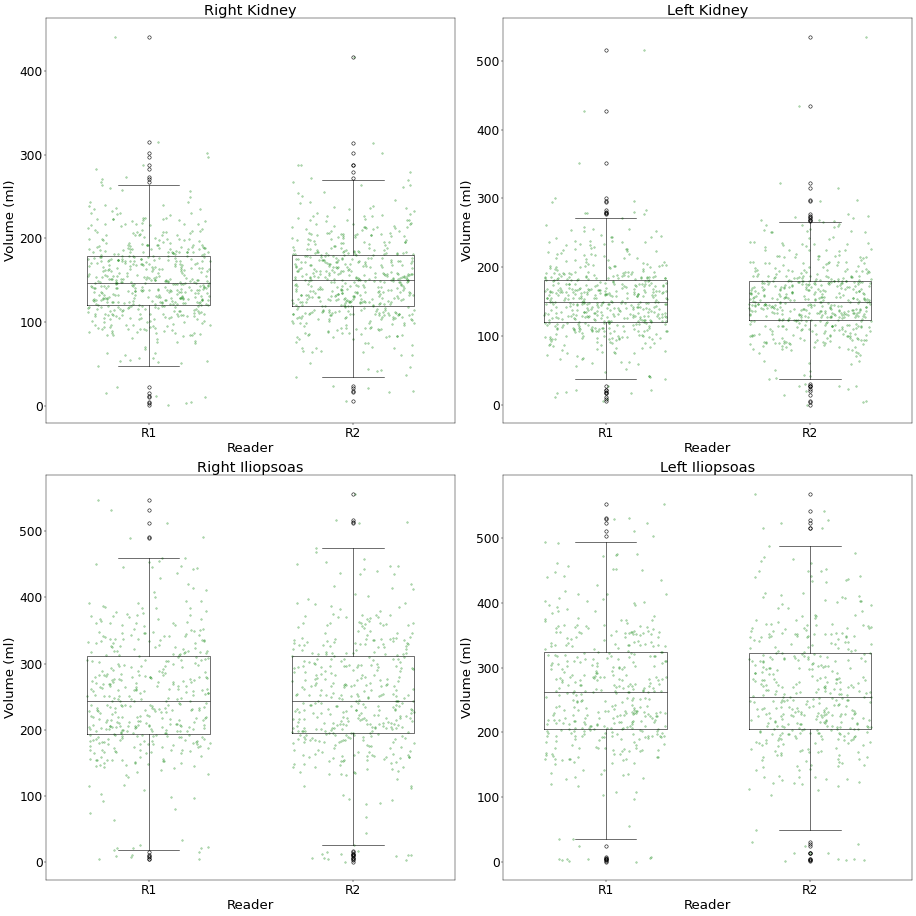

In [4]:
import pandas
import numpy as np
from statsmed import statsmed
import matplotlib.pyplot as plt

# Load paired measurements for multiple structures
data = pandas.read_csv('ex6.csv', delimiter=',', on_bad_lines='skip')

# Apply lower cut-off and convert to ml
rk = data[['kidney_right_volume_R1','kidney_right_volume_R2']][(data['kidney_right_volume_R1'] > 10) & (data['kidney_right_volume_R2'] > 10)]/1000
lk = data[['kidney_left_volume_R1','kidney_left_volume_R2']][(data['kidney_left_volume_R1'] > 10) & (data['kidney_left_volume_R2'] > 10)]/1000
ri = data[['iliopsoas_right_volume_R1','iliopsoas_right_volume_R2']][(data['iliopsoas_right_volume_R1'] > 10) & (data['iliopsoas_right_volume_R2'] > 10)]/1000
li = data[['iliopsoas_left_volume_R1','iliopsoas_left_volume_R2']][(data['iliopsoas_left_volume_R1'] > 10) & (data['iliopsoas_left_volume_R2'] > 10)]/1000

fig = plt.figure(figsize=(23, 23), dpi=40)

# Right kidney
x1 = fig.add_subplot(2, 2, 1)
statsmed.boxplot_figure(
    x1,
    [rk['kidney_right_volume_R1'], rk['kidney_right_volume_R2']],
    False,
    mode='no normal distribution',
    title='Right Kidney',
    x_label='Reader',
    y_label='Volume (ml)',
    x_ticklabels=['R1', 'R2'],
    show_p_values=True
)

# Left kidney
x2 = fig.add_subplot(2, 2, 2)
statsmed.boxplot_figure(
    x2,
    [lk['kidney_left_volume_R1'], lk['kidney_left_volume_R2']],
    False,
    mode='no normal distribution',
    title='Left Kidney',
    x_label='Reader',
    y_label='Volume (ml)',
    x_ticklabels=['R1', 'R2'],
    show_p_values=True
)

# Right iliopsoas
x3 = fig.add_subplot(2, 2, 3)
statsmed.boxplot_figure(
    x3,
    [ri['iliopsoas_right_volume_R1'], ri['iliopsoas_right_volume_R2']],
    False,
    mode='no normal distribution',
    title='Right Iliopsoas',
    x_label='Reader',
    y_label='Volume (ml)',
    x_ticklabels=['R1', 'R2'],
    show_p_values=True
)

# Left iliopsoas
x4 = fig.add_subplot(2, 2, 4)
statsmed.boxplot_figure(
    x4,
    [li['iliopsoas_left_volume_R1'], li['iliopsoas_left_volume_R2']],
    False,
    mode='no normal distribution',
    title='Left Iliopsoas',
    x_label='Reader',
    y_label='Volume (ml)',
    x_ticklabels=['R1', 'R2'],
    show_p_values=True
)

plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig('Boxplots_subplots.png', transparent=False)  # saves the figure

### 2.2 What to write?

In the statistical analysis section of a manuscript you may write:

"Continuous data are presented using boxplots: the central line indicates median, bottom and top edges of the box indicate the 25th and 75th percentiles, respectively, whiskers indicate the 5th and 95th percentiles, individual observations are overlaid as points. Group comparisons were performed using appropriate tests depending on normality (t-test for normally distributed independent data, Wilcoxon/Mann–Whitney otherwise, paired tests for matched samples). Significant differences are indicated by p-values."

In figure legends where you used boxplots, you may write:

"Boxplots depict medians and interquartile ranges with individual observations overlaid. Significant pairwise group differences are indicated by brackets and corresponding p-values."